## 🦉 COSADAMA WEEK 9. 네트워크 분석 기초

네트워크 툴 2가지 Gephi, NetworkX 학습!

### 1. Gephi를 이용한 네트워크 시각화

[Notion 참고](https://www.notion.so/78a4bc2042514950a26e76506888d61f?v=d08a840d0d6740718182087e93546ba9)

### 2. NetworkX: Network Analysis with Python

[NetworkX Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)

* In NetworkX, nodes can be any hashable(which never changes during its lifetime) object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
g = nx.Graph() # 폼(?)만 만듦 add 하지 않으면
g.add_edge('a','b',weight=0.1)
g.add_edge('b','c',weight=2.0)
g.add_edge('a','c',weight=5.0)
g.add_edge('c','d',weight=2.2)

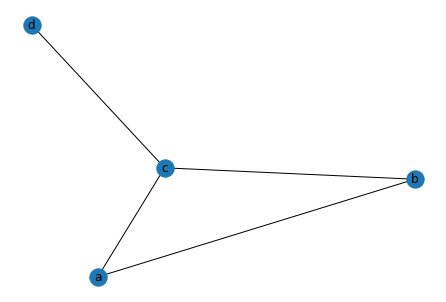

In [9]:
nx.draw(g, with_labels = True, weight=True)
# plt.savefig('exampl.png') - 이미지 저장

**Node**

* You can add one node at a time, add a list of nodes, or add any iterable(member를 하나씩 차례로 반환 가능한 obj : sequence type -> list, str, tuple etc) container of nodes.

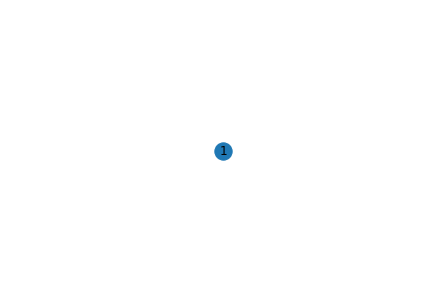

In [12]:
g = nx.Graph()
g.add_node(1)
nx.draw(g,with_labels = 1)

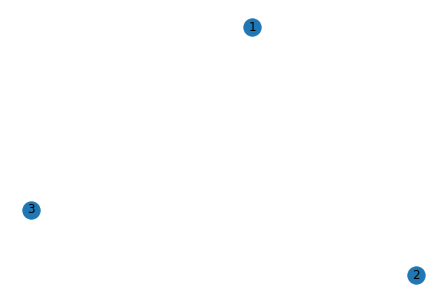

In [13]:
g.add_nodes_from([2,3])
nx.draw(g, with_labels = True)

* 한 번에 노드 여러 개 만들기

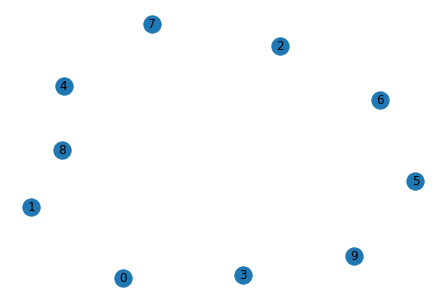

In [16]:
h = nx.path_graph(10) # 10개 노드 집단 설정
g.add_nodes_from(h)
nx.draw(g,with_labels = 1)

* 노드 지우기 `remove_node`

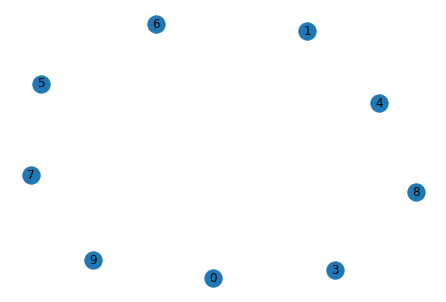

In [17]:
g.remove_node(2) # 노드 2 지워줘
nx.draw(g, with_labels = True)

[1, 2, <built-in function tan>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>, <built-in function sin>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>, <built-in function cos>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>]


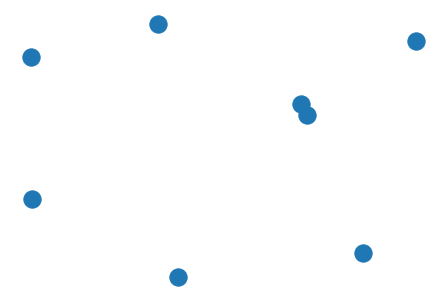

In [51]:
import math 
g.add_node(math.cos) # 코사인
fh = open('tmp.txt','w') # 파일에다 쓰기
g.add_node(fh) # fh에 노드 그리기 
print(g.nodes())
nx.draw(g)

[1, 2, <built-in function tan>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>, <built-in function sin>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>, <built-in function cos>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>, <_io.TextIOWrapper name='tmp1.txt' mode='w' encoding='cp949'>]


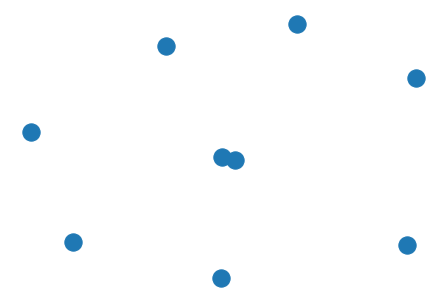

In [52]:
import math 
g.add_node(math.tan) # 코사인
fh = open('tmp1.txt','w') # 파일에다 쓰기
g.add_node(fh) # fh에 노드 그리기 
print(g.nodes())
nx.draw(g)

[1, 2, <built-in function tan>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>, <built-in function sin>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>, <built-in function cos>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='cp949'>, <_io.TextIOWrapper name='tmp1.txt' mode='w' encoding='cp949'>, <_io.TextIOWrapper name='tmp2.txt' mode='w' encoding='cp949'>]


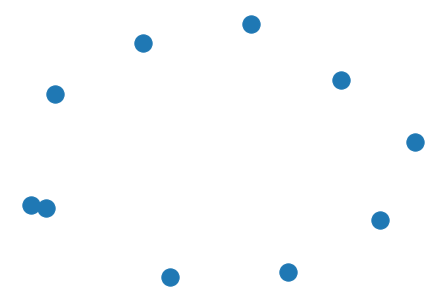

In [53]:
import math 
g.add_node(math.sin) # 코사인
fh = open('tmp2.txt','w') # 파일에다 쓰기
g.add_node(fh) # fh에 노드 그리기 
print(g.nodes())
nx.draw(g)

In [21]:
print(math.cos)

<built-in function cos>


**Edge**

* Graph can also be grown by adding one edge at a time,by adding a list of edges, or by adding any ebunch(any iterable container of edge-tuples) of edges
* 가중치도 둘 수 있음 `(2, 3, {'weight': 3.1415})`

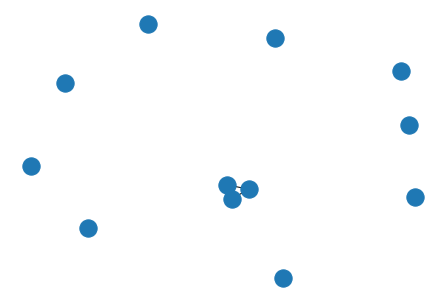

In [22]:
g.add_edge(1,2)
e=(2,3)
g.add_edge(*e) # unpack edge tuple
nx.draw(g)

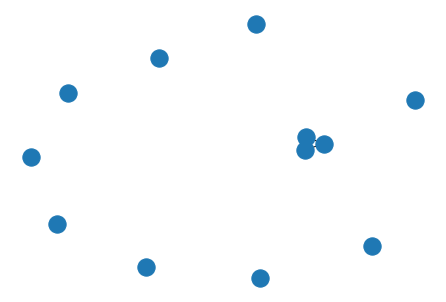

In [20]:
g.add_edges_from([(1,2), (1,3)])
nx.draw(g)

In [27]:
g.clear()

In [28]:
g.add_edges_from([(1, 2), (1, 3)])
g.add_node(1)
g.add_edge(1, 2)
g.add_node("spam")        # adds node "spam"
g.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
g.add_edge(3, 'm')

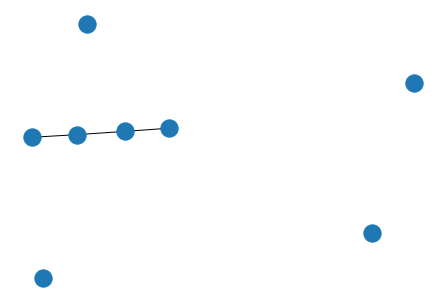

In [29]:
nx.draw(g)

In [30]:
list(g.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [31]:
list(g.edges)

[(1, 2), (1, 3), (3, 'm')]

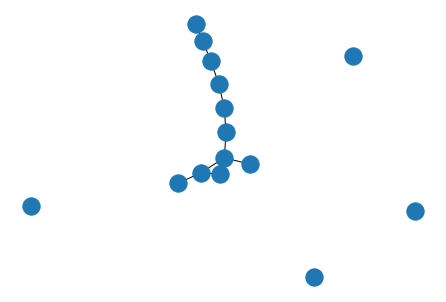

In [32]:
# container of edges 
g.add_edges_from(h.edges()) 
nx.draw(g)

* Edge 지우기

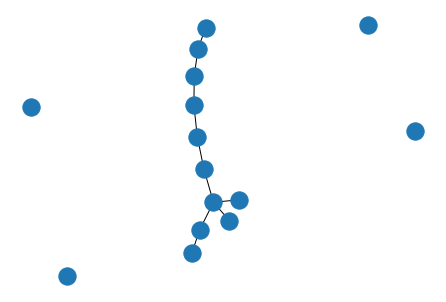

In [33]:
# In contrast, you can remove any edge of the graph
g.remove_edge(1,2)
nx.draw(g)

**Accessing edges and neighbors**

None


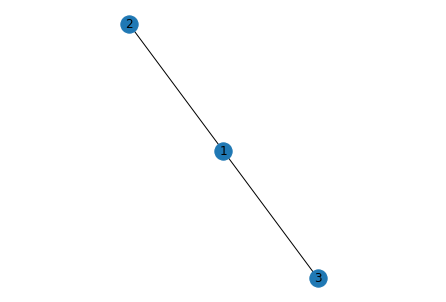

In [34]:
g = nx.Graph()
g.add_edges_from([(1,2),(1,3)])
print(nx.draw(g, with_labels=True))

None


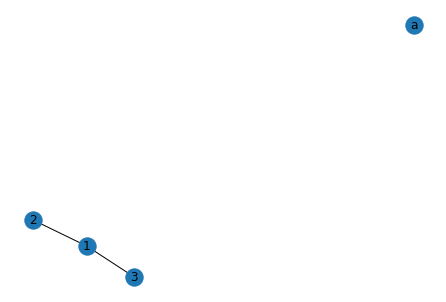

In [35]:
g.add_node('a')
print(nx.draw(g, with_labels=True))

In [37]:
print(g.number_of_nodes())
print(g.number_of_edges())

4
2


In [38]:
g.nodes

NodeView((1, 2, 3, 'a'))

In [39]:
g.edges

EdgeView([(1, 2), (1, 3)])

In [40]:
g.degree

DegreeView({1: 2, 2: 1, 3: 1, 'a': 0})

In [41]:
g.adj # 누구랑 인접한지

AdjacencyView({1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}}, 'a': {}})

In [43]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 2
Average degree:   1.0000


**Directed Graph**

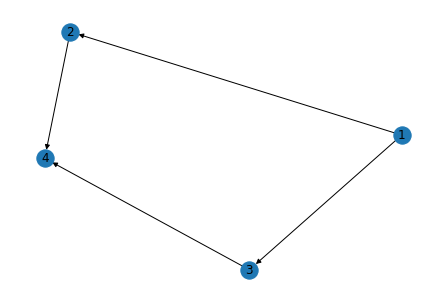

In [44]:
g2 = nx.DiGraph()
g2.add_edges_from([(1,2),(1,3),(2,4),(3,4)])
nx.draw(g2, with_labels=1, font_weigth='bold')

In [45]:
g2.in_degree # 화살표 받는 애

InDegreeView({1: 0, 2: 1, 3: 1, 4: 2})

In [46]:
g2.out_degree # 화살표 뿜는 애

OutDegreeView({1: 2, 2: 1, 3: 1, 4: 0})

* Any NetworkX graph behaves like a Python dictionary with nodes as primary keys

In [47]:
g = nx.Graph()
g.add_edge(1,2, weight=4.0) # 가중치 4로 설정
g[1][2]['weight'] = 5.0 # 가중치 5로 해줘
g[1][2]

{'weight': 5.0}

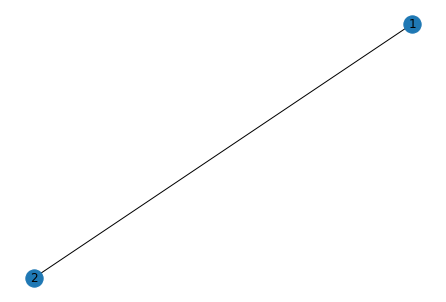

In [48]:
nx.draw(g, with_labels=True)

**Drawing Graphs**

* 그래프의 레이아웃을 바꿔보자

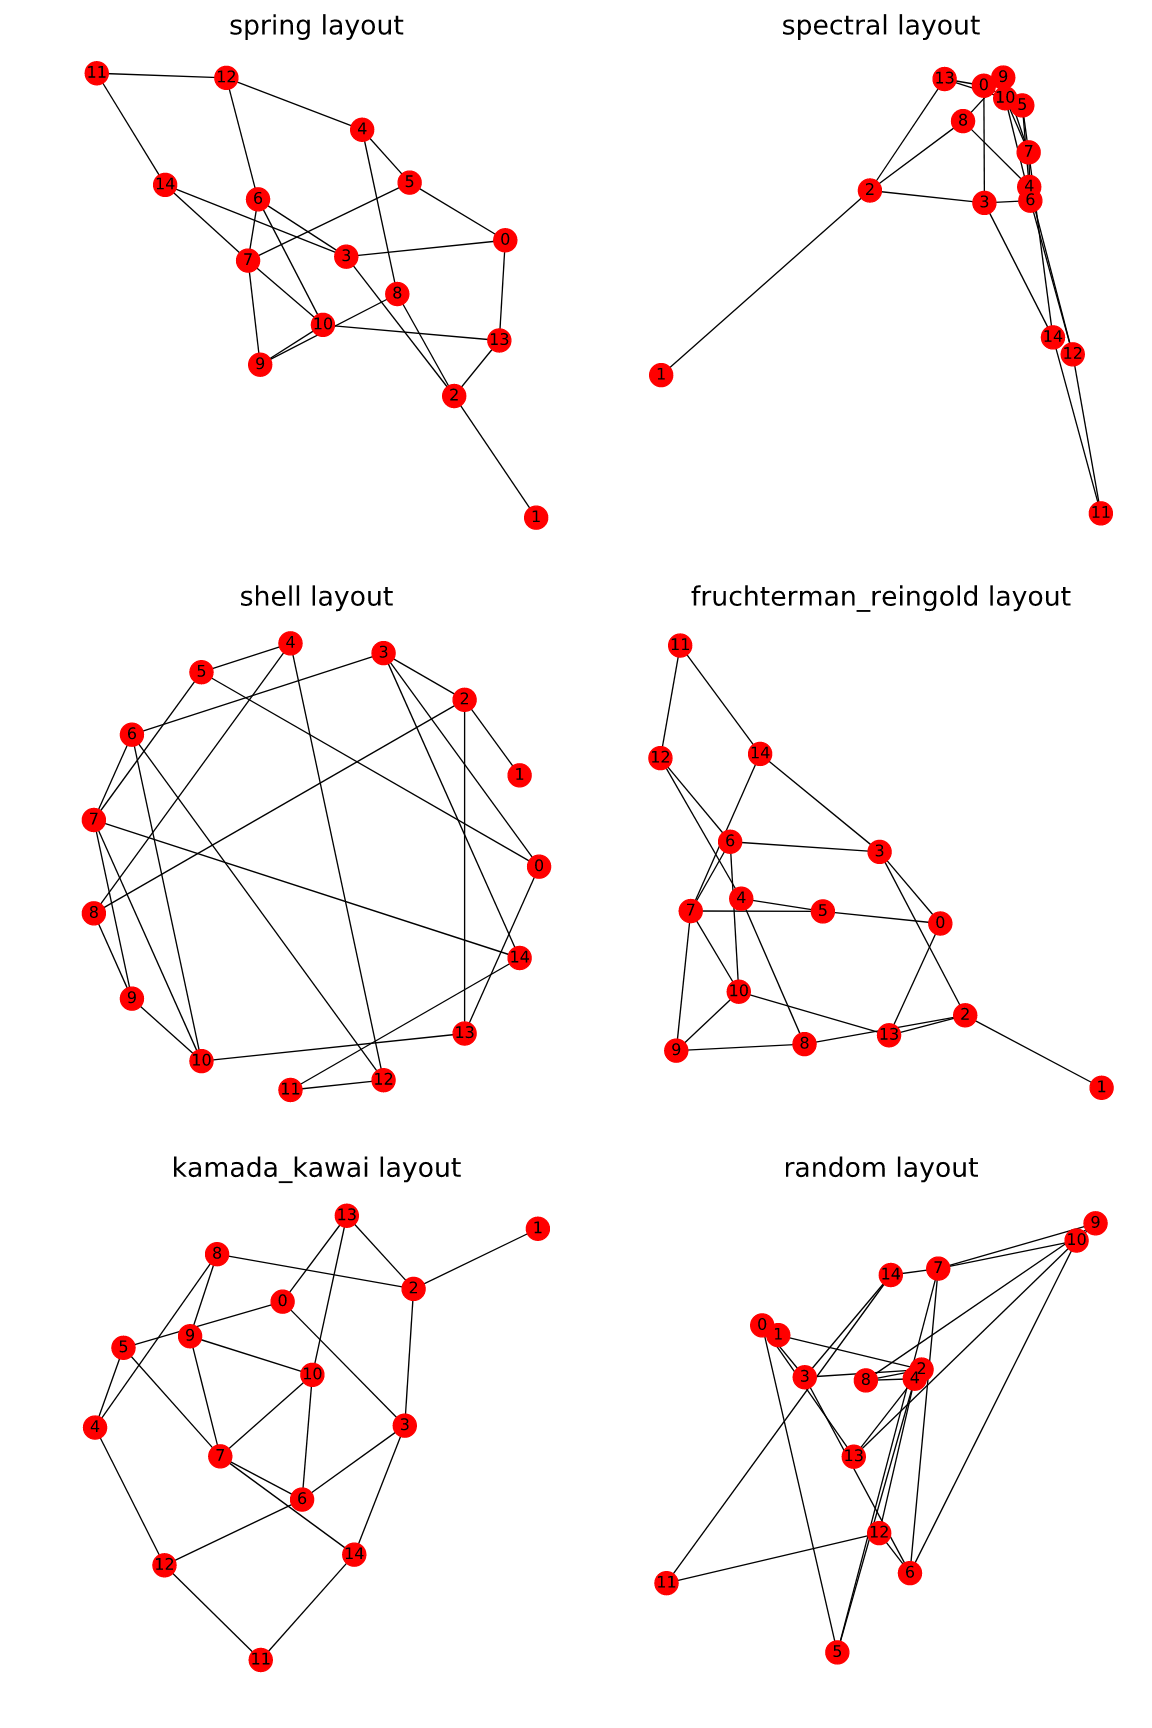

In [54]:
g = nx.Graph()

In [55]:
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(6,7)
g.add_edge(1,4)
g.add_edge(1,5)
g.add_edge(2,4)
g.add_edge(4,7)
g.add_edge(4,8)

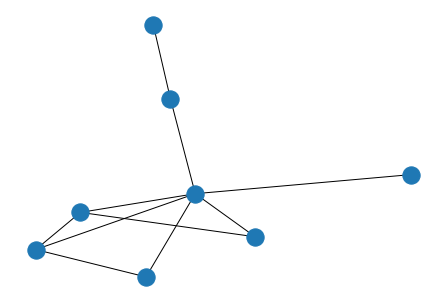

In [56]:
nx.draw(g)

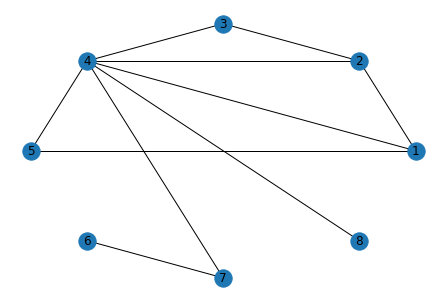

In [57]:
# a circular layout 
nx.draw_circular(g, with_labels = True)

In [58]:
# clearing the current plot 
plt.clf()

<Figure size 432x288 with 0 Axes>

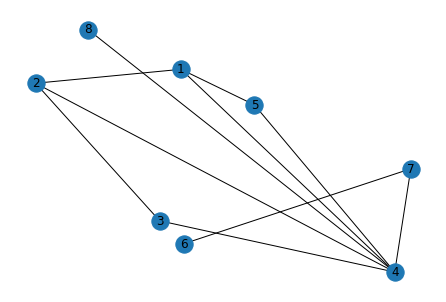

In [59]:
# Draw the graph G with a random layout.
nx.draw_random(g,with_labels=True)

C:\Users\Owner\anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


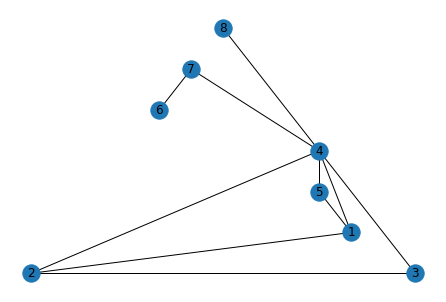

In [60]:
# planar layout 
nx.draw_planar(g, with_labels = True)

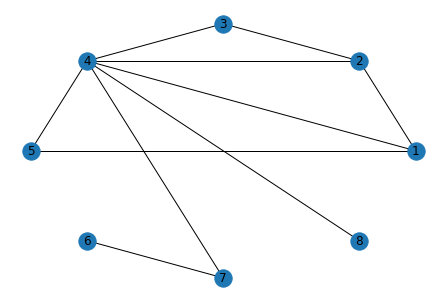

In [61]:
# shell layout 
nx.draw_shell(g, with_labels = True)

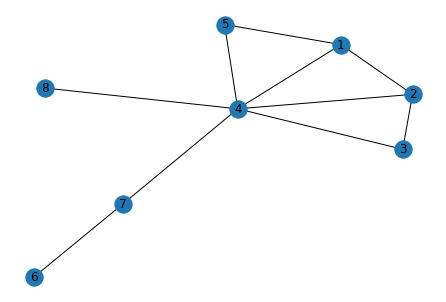

In [62]:
# spring layout 
nx.draw_spring(g, with_labels=True)

In [63]:
plt.clf()

<Figure size 432x288 with 0 Axes>

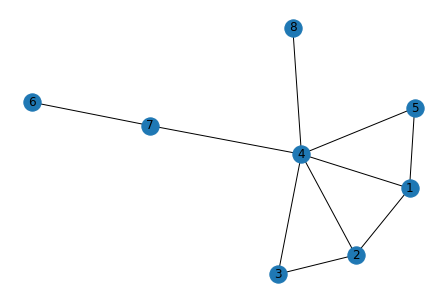

In [64]:
# spring layout 
nx.draw_spring(g, with_labels=True)

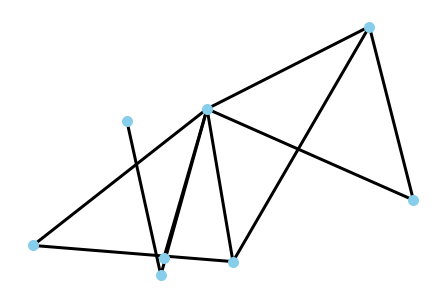

In [65]:
options = {
    'node_color': 'skyblue',
    'node_size': 100,
    'width':3
}
nx.draw_random(g, **options)

**Using the pre-built Graph**

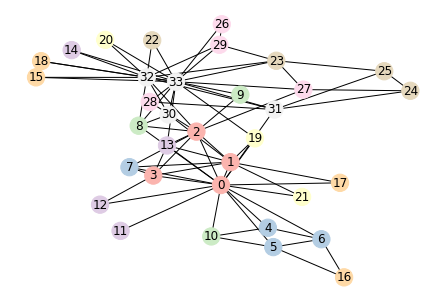

In [71]:
# 내장된 노드 데이터 
g = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(g)
# Plot the graph
nx.draw(g, node_color=range(34), node_size=300, 
        cmap=plt.get_cmap('Pastel1'),
        with_labels=True, pos=pos)

In [72]:
g.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [74]:
degree_seq = list(g.degree())
print(degree_seq)

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


In [75]:
# 노드 수
nb_nodes = 34
# 연결선 수
nb_arr = len(g.edges())
# np.array로 바꾸어줘야 넘파이 연산 가능, 오른쪽 기준 계산
avg_degree = np.mean(np.array(degree_seq)[:,1])
med_degree = np.median(np.array(degree_seq)[:,1])
max_degree = max(np.array(degree_seq)[:,1])
min_degree = np.min(np.array(degree_seq)[:,1])

In [76]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))
print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))
print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0


**Case study using FB data**

* csv 파일을 그래프로 만들어보기

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('facebook_combined.txt')
df.head()

,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6


In [79]:
# Read a graph from a list of edges
g = nx.read_edgelist('facebook_combined.txt', 
                     create_using=nx.Graph(),
                    nodetype=int)

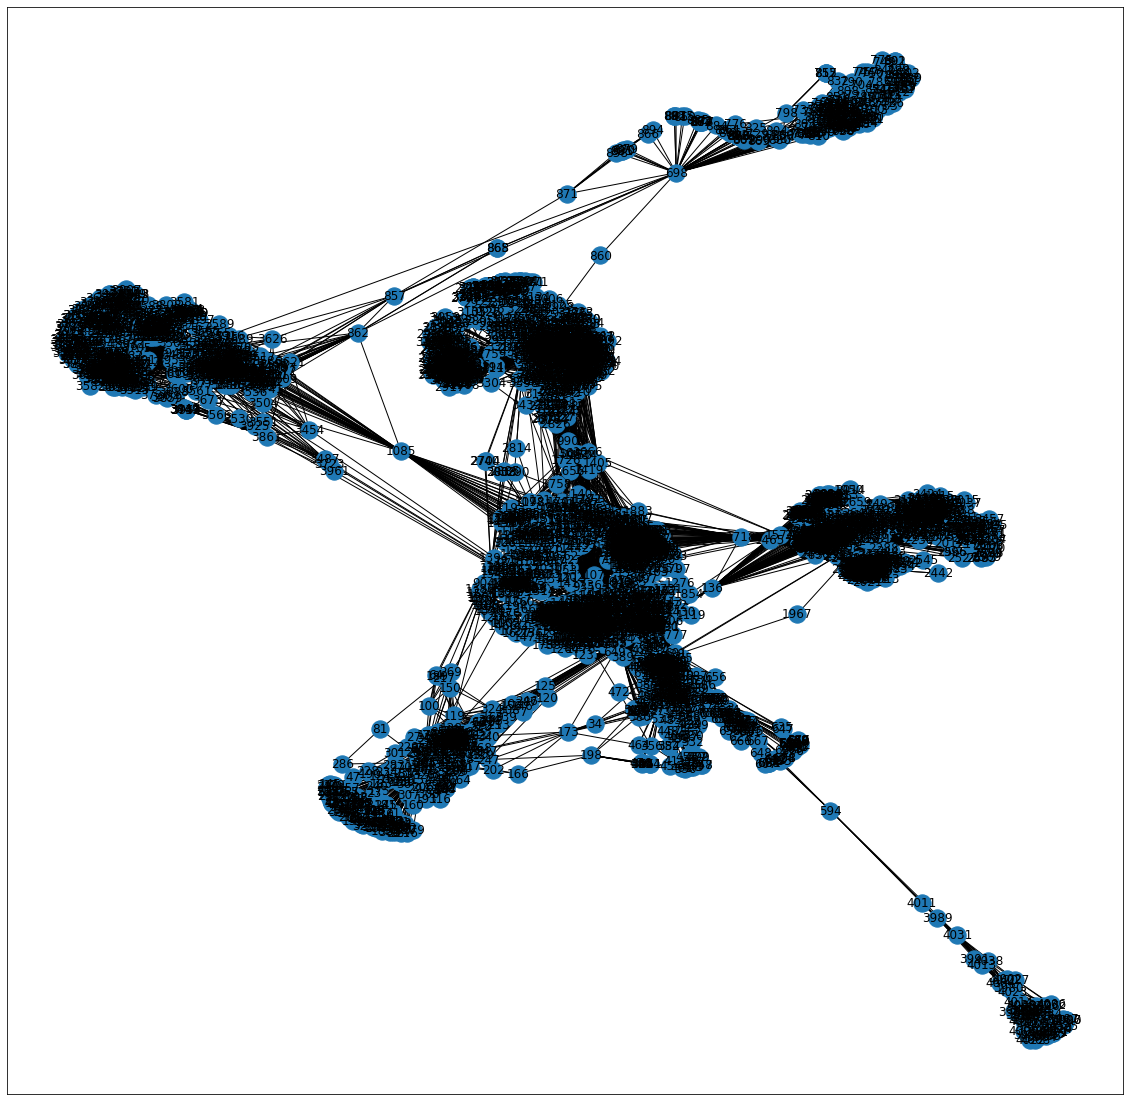

In [80]:
plt.figure(figsize=(20,20))
nx.draw_networkx(g)

* Betweenness Centrality (노드가 Shortest Path를 계산했을 때 이것을 지나가는가? 지나갈수록 중요한 노드) 를 중심으로 그래프 그리기

    [Centrality에 대하여](https://frhyme.github.io/python-lib/network-centrality/#betweenness-centrality)

(-0.9900482563250141,
 0.8777312327814895,
 -1.0859368943129066,
 0.7821603320990089)

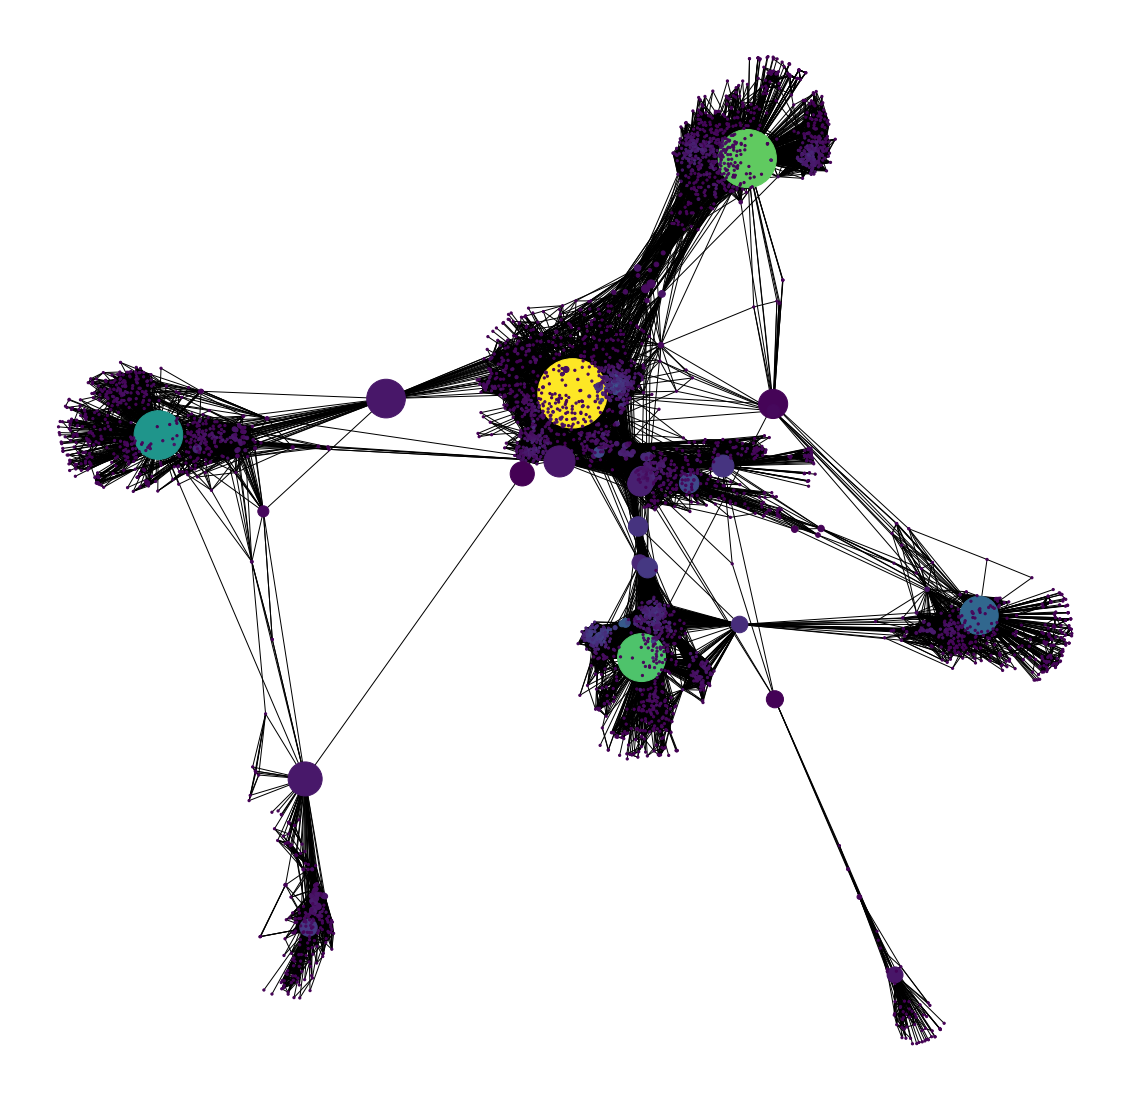

In [81]:
pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, 
                                   endpoints=True)
node_color = [2000.0 * g.degree(v) for v in g]
node_size = [v * 10000 for v in betCent.values()]

plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=False,
                node_color=node_color,
                node_size=node_size)
plt.axis('off')

원이 클수록 노드의 중요도가 높은 것~